In [6]:
pip install somber
pip install minisom

SyntaxError: invalid syntax (<ipython-input-6-be09c2409220>, line 1)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import seaborn as sns

from minisom import MiniSom
from somber import Som

In [8]:
nb = [pd.read_csv("NewBlade00%d.csv"%i) for i in range(1,4)]
wb = [pd.read_csv("WornBlade00%d.csv"%i) for i in range(1,4)]
                                                        
columns = ["timestamp", "cut_torque", "cut_lag_error", "cut_position","cut_speed",
           "film_position", "film_speed","film_lag_error"]
signals = ["cut_torque", "cut_lag_error", "cut_position","cut_speed",
           "film_position", "film_speed","film_lag_error"]

scaler = StandardScaler()
scaler.fit(np.concatenate([new_.values for new_ in nb]))

for i in range(3):
    nb[i].iloc[:,1:] = scaler.transform(nb[i].astype(float))[:,1:]
    wb[i].iloc[:,1:] = scaler.transform(wb[i].astype(float))[:,1:]
    nb[i].columns = columns
    wb[i].columns = columns
    
newblade=np.concatenate((np.array(nb[0].iloc[:,1:]),
                         np.array(nb[1].iloc[:,1:]),
                         np.array(nb[2].iloc[:,1:])), axis=0)

wornblade=np.concatenate((np.array(wb[0].iloc[:,1:]),
                          np.array(wb[1].iloc[:,1:]),
                          np.array(wb[2].iloc[:,1:])), axis=0)

blade=np.concatenate((newblade,wornblade), axis=0)
bladet=np.concatenate((np.array(nb[0].iloc[:,:]),
                       np.array(nb[1].iloc[:,:]),
                       np.array(nb[2].iloc[:,:]),
                       np.array(wb[0].iloc[:,:]),
                       np.array(wb[1].iloc[:,:]),
                       np.array(wb[2].iloc[:,:])),axis=0)


bladedf=pd.DataFrame(bladet,columns=columns)

In [9]:
bladedf.describe()

,timestamp,cut_torque,cut_lag_error,cut_position,cut_speed,film_position,film_speed,film_lag_error
count,12288.000000,12288.000000,12288.000000,12288.000000,12288.000000,12288.000000,12288.000000,12288.000000
mean,3.936000,0.021725,-0.000848,1.364579,0.039320,3.343565,0.191768,0.109674
std,2.365979,1.115682,1.001572,1.740067,1.031210,4.249910,0.916590,0.871884
min,-0.192000,-7.434515,-15.437559,-1.536285,-1.426979,-1.274098,-1.838821,-5.392104
25%,1.888000,-0.609573,-0.255668,0.388629,-0.768130,-0.170707,-0.733235,-0.068682
50%,3.936000,-0.169582,-0.003066,1.192399,-0.270575,1.853563,0.219605,0.255138
75%,5.984000,1.130297,0.268366,2.542067,0.918634,6.080634,1.106982,0.554997
max,8.187999,2.056789,9.453929,4.479012,2.176188,12.096423,2.179836,2.615868


In [10]:
nb[0].describe()

,timestamp,cut_torque,cut_lag_error,cut_position,cut_speed,film_position,film_speed,film_lag_error
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,3.906000,0.120371,-0.009013,-1.348849,0.032639,-0.618578,0.189406,0.200362
std,2.365404,1.017639,0.982936,0.158132,1.048708,0.469388,0.802519,0.656354
min,-0.188000,-5.927655,-13.215911,-1.536285,-1.426979,-1.273968,-1.813363,-2.755685
25%,1.859000,-0.499206,-0.253658,-1.512477,-0.804353,-1.105319,-0.722325,-0.056324
50%,3.906000,-0.120692,-0.005828,-1.322347,-0.308849,-0.632125,0.215968,0.247785
75%,5.953000,1.202702,0.252933,-1.243657,0.972626,-0.169696,1.056067,0.561448
max,7.999999,1.986307,8.903593,-1.081851,2.165253,0.191610,1.201539,1.908936


In [11]:
wb[0].describe()

,timestamp,cut_torque,cut_lag_error,cut_position,cut_speed,film_position,film_speed,film_lag_error
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,3.906000,-0.019702,-0.005050,1.432451,0.121467,2.659944,0.528608,0.226804
std,2.365404,1.187268,1.068729,0.167249,1.049572,0.534639,0.804770,0.891167
min,-0.188000,-7.434515,-11.637445,1.192162,-1.426979,1.853432,-1.813363,-4.696660
25%,1.859000,-0.669850,-0.323976,1.264450,-0.798202,2.148485,0.201421,0.069942
50%,3.906000,-0.192196,-0.007704,1.459125,0.058849,2.655115,0.234152,0.333919
75%,5.953000,1.119627,0.317956,1.565337,0.973310,3.167226,1.110619,0.621074
max,7.999999,1.999559,7.731619,1.698580,2.176188,3.568752,2.179836,2.410946


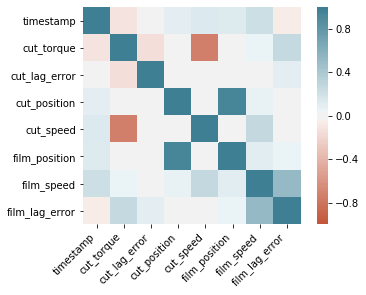

In [12]:
corr = bladedf.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

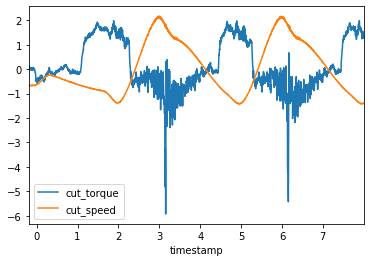

In [13]:
ax = plt.gca()
nb[0].plot(kind="line",x="timestamp",y="cut_torque",ax=ax)
nb[0].plot(kind="line",x="timestamp",y="cut_speed",ax=ax)
plt.show()

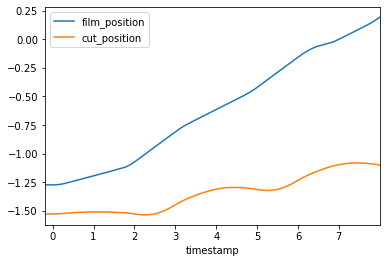

In [14]:
ax = plt.gca()
nb[0].plot(kind="line",x="timestamp",y="film_position",ax=ax)
nb[0].plot(kind="line",x="timestamp",y="cut_position",ax=ax)
plt.show()

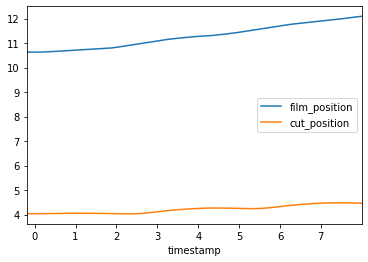

In [15]:
ax = plt.gca()
wb[2].plot(kind="line",x="timestamp",y="film_position",ax=ax)
wb[2].plot(kind="line",x="timestamp",y="cut_position",ax=ax)
plt.show()

100%|██████████| 48/48 [00:07<00:00,  6.84it/s]


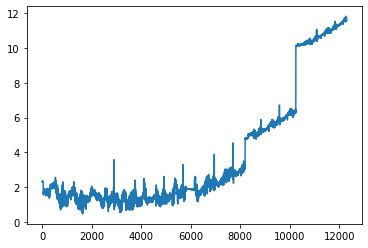

In [16]:
s = Som((50, 50),7, learning_rate=0.001)
s.fit(newblade, num_epochs=10, updates_epoch=1000,batch_size=128, show_progressbar=True)
quantization_error = s.quantization_error(blade[:,:])
plt.plot(quantization_error)

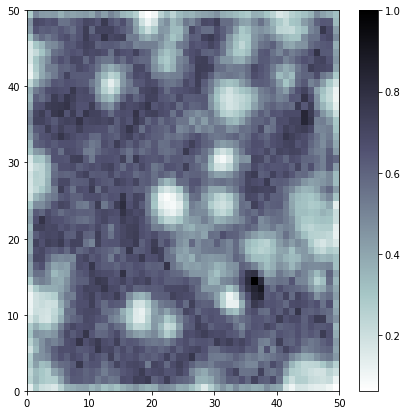

In [26]:
som = MiniSom(50, 50, 7, learning_rate=0.1)
som.train_random(data=newblade,num_iteration=5000)

plt.figure(figsize=(7, 7))
# Plotting the response for each pattern
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

In [18]:
BMU=s.predict(blade[:,:]) #Finds BMU of each input data
mw=s.map_weights()   #returns weights of trained neurons
st=s.transform(blade[:,:])    #calculates the difference between input and neurons

In [19]:
TotalError=[]
for i in range(12288):
    TotalError.append(st[i][BMU[i]])

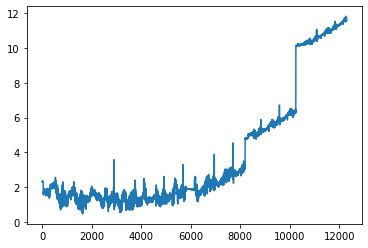

In [20]:
plt.plot(TotalError)

In [21]:
#The weights of BMU for each input data is found and listed

BMUweight=[]
for i in range(12288): 
    bmu=BMU[i] 
    bmur=int(bmu/50) 
    bmuc=bmu%50
    BMUweight.append(mw[bmur][bmuc])

In [22]:
bladeqe=[]              #All the quantization_error is calculated in vectors
bladeqesqrd=[]          #All the quantization_error is calculated in vectors squared
TotalErrorsqrd=[]       #Total error squared
bladeqefr=[]            #Contribution of signals to the reconstruction error is calculated
for i in range(12288):
    bladeqe.append(blade[i,:]-BMUweight[i])
    bladeqesqrd.append(bladeqe[i]*bladeqe[i])
    TotalErrorsqrd.append(TotalError[i]*TotalError[i])
    bladeqefr.append(bladeqesqrd[i]/TotalErrorsqrd[i])

In [23]:
fr=pd.DataFrame(bladeqefr)

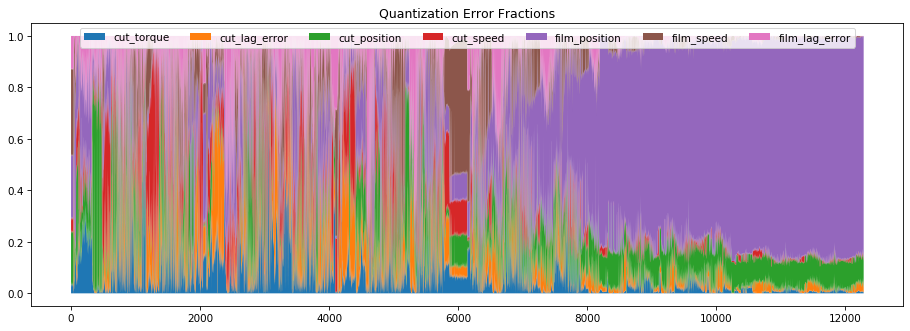

In [24]:
fig, ax = plt.subplots(figsize=(15,5), dpi=75)
ax.set_title("Quantization Error Fractions")

for j in range(7):
    lower = np.sum(fr.iloc[:,:j], axis=1)
    upper = np.sum(fr.iloc[:,:j + 1], axis=1)
    ax.fill_between(fr.index, lower, upper, label=columns[j + 1])


_ = ax.legend(loc="upper center", ncol=7)

In [25]:
means = np.mean(fr[-4000:], axis=0)
for i, amean in enumerate(means):
    print("{0: <15s}: {1:0.2f}%".format(columns[i+1], amean*100))

cut_torque     : 1.68%
cut_lag_error  : 2.73%
cut_position   : 11.47%
cut_speed      : 1.51%
film_position  : 80.73%
film_speed     : 1.02%
film_lag_error : 0.86%
